In [1]:
import lsst.daf.persistence as dafPersist
import re
import pickle
import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools


from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np

import multiprocessing

import sncosmo

In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Tests"
DATADIR_TESTS=DATADIR+"/tests"
DATADIR_CONTROL=DATADIR+"/control"


In [4]:
patches= []
with open(DATADIR+"/patches.txt", "rb") as patches_file:
    for line in patches_file:
            line = line.replace('\n','')
            text = re.split("=| ",line)
            patches.append(text[-1])

In [5]:
days = ['2004-05-09']
##GO TO END


In [32]:
results_tests = {}
for ncoadd in n_coadds:
    butler = dafPersist.Butler(DATADIR_TESTS+str(ncoadd))
    for day in days:
        
        for patch in patches:
            
            dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}
            diffcat = butler.get("dayDiff_class_diaSrc", dataId=dataId)
            if results_tests.has_key(patch):
                results_tests[patch].update({ncoadd:len(diffcat)})
            else:
                results_tests[patch] = {ncoadd:len(diffcat)}
            

In [34]:
results_control = {}
for ncoadd in n_coadds:
    print ncoadd
    butler = dafPersist.Butler(DATADIR_CONTROL+str(ncoadd))
    
    for day in days:
        for patch in patches:
            dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}
            diffcat = butler.get("dayDiff_class_diaSrc", dataId=dataId)
            if results_control.has_key(patch):
                results_control[patch].update({ncoadd:len(diffcat)})
            else:
                results_control[patch] = {ncoadd:len(diffcat)}

10
11
12
13
14
15


In [35]:
results_control

{'10,10': {10: 182, 11: 194, 12: 171, 13: 187, 14: 158, 15: 175},
 '10,15': {10: 99, 11: 104, 12: 111, 13: 112, 14: 109, 15: 111},
 '11,14': {10: 165, 11: 163, 12: 159, 13: 166, 14: 156, 15: 180},
 '12,12': {10: 85, 11: 95, 12: 96, 13: 109, 14: 119, 15: 104},
 '12,13': {10: 118, 11: 120, 12: 110, 13: 111, 14: 115, 15: 113},
 '13,12': {10: 125, 11: 134, 12: 138, 13: 144, 14: 131, 15: 130},
 '13,13': {10: 112, 11: 119, 12: 137, 13: 138, 14: 138, 15: 140},
 '14,14': {10: 92, 11: 81, 12: 127, 13: 146, 14: 151, 15: 134},
 '15,10': {10: 378, 11: 429, 12: 432, 13: 449, 14: 377, 15: 443},
 '15,15': {10: 145, 11: 142, 12: 165, 13: 159, 14: 154, 15: 153}}

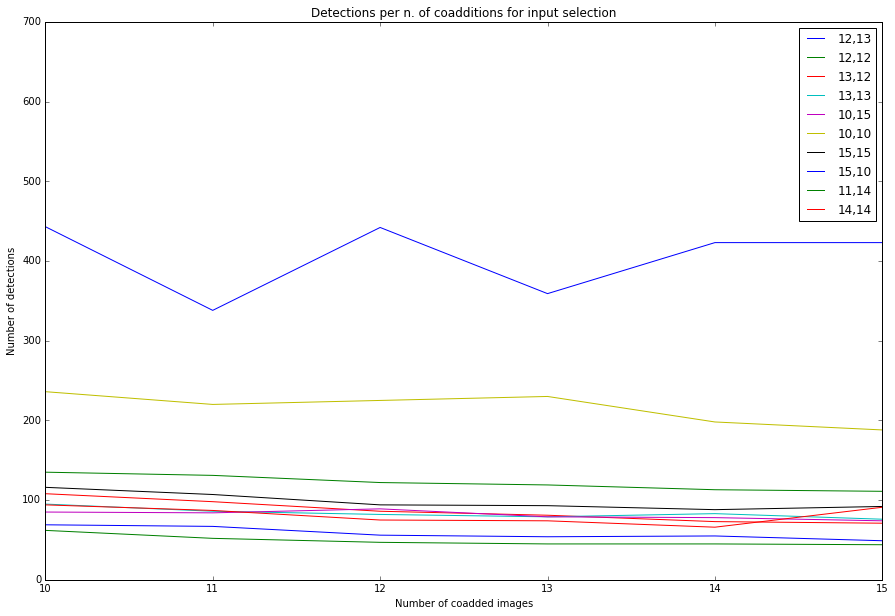

In [53]:
plt.figure(figsize=(15,10))
for patch in results_tests.keys():
    patch_arr = []
    for ncoadd in results_tests[patch].keys():
        patch_arr.append(results_tests[patch][ncoadd])
        
    plt.plot(range(10,16),patch_arr, label=patch)
    
plt.title("Detections per n. of coadditions for input selection")
plt.xlabel("Number of coadded images")
plt.ylabel("Number of detections")
plt.legend()
plt.ylim(ymin=0, ymax=700)
plt.show()
    

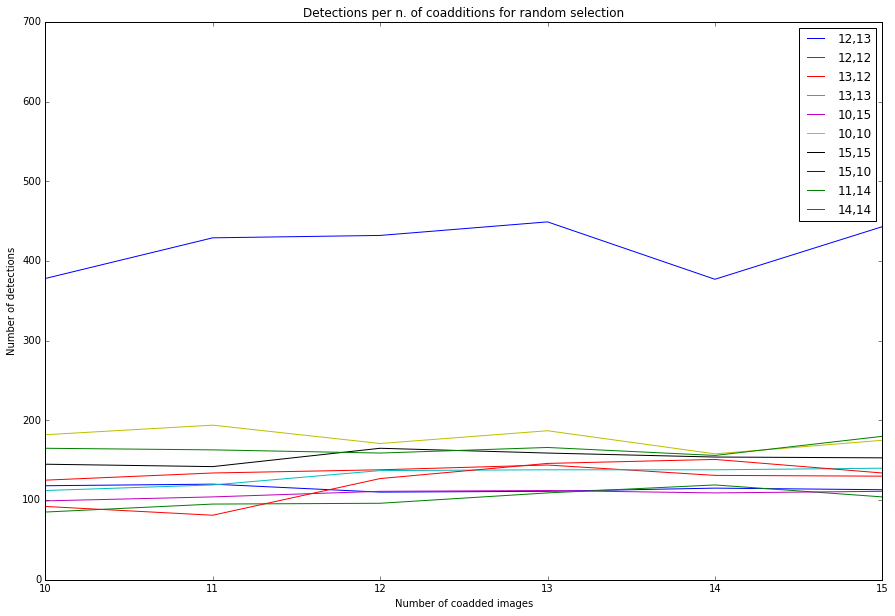

In [54]:
plt.figure(figsize=(15,10))
for patch in results_control.keys():
    patch_arr = []
    for ncoadd in results_control[patch].keys():
        patch_arr.append(results_control[patch][ncoadd])
        
    plt.plot(range(10,16),patch_arr, label=patch)

    
plt.title("Detections per n. of coadditions for random selection")
plt.xlabel("Number of coadded images")
plt.ylabel("Number of detections")
plt.ylim(ymin=0, ymax=700)

plt.legend()
plt.show()

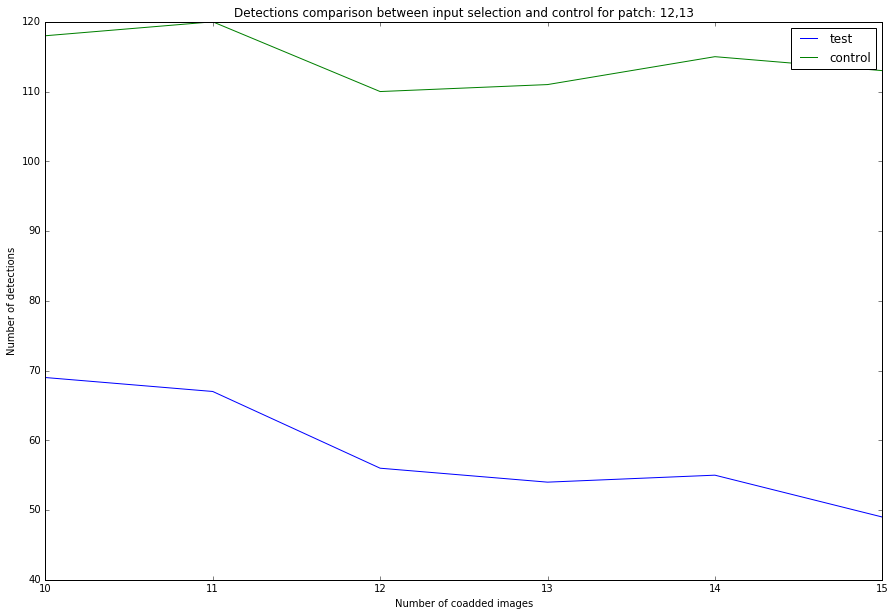

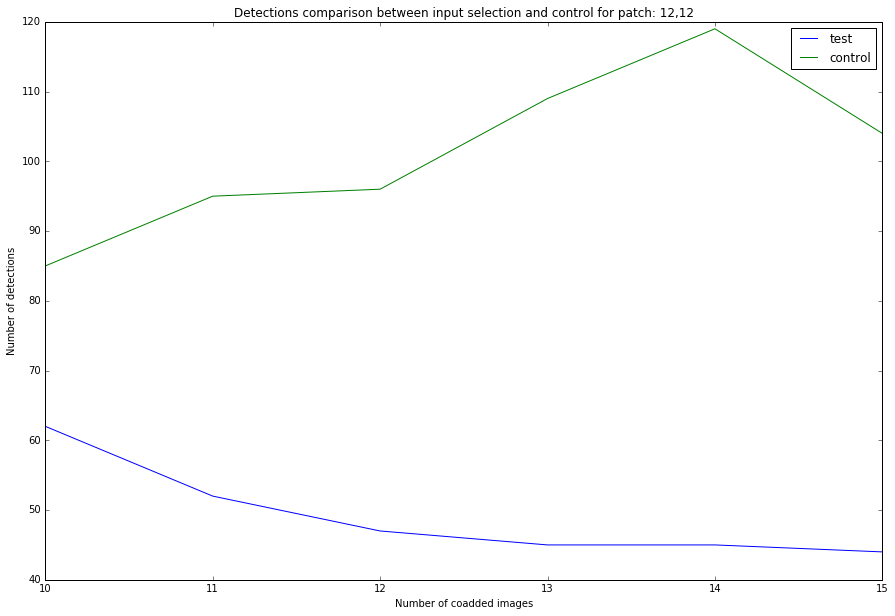

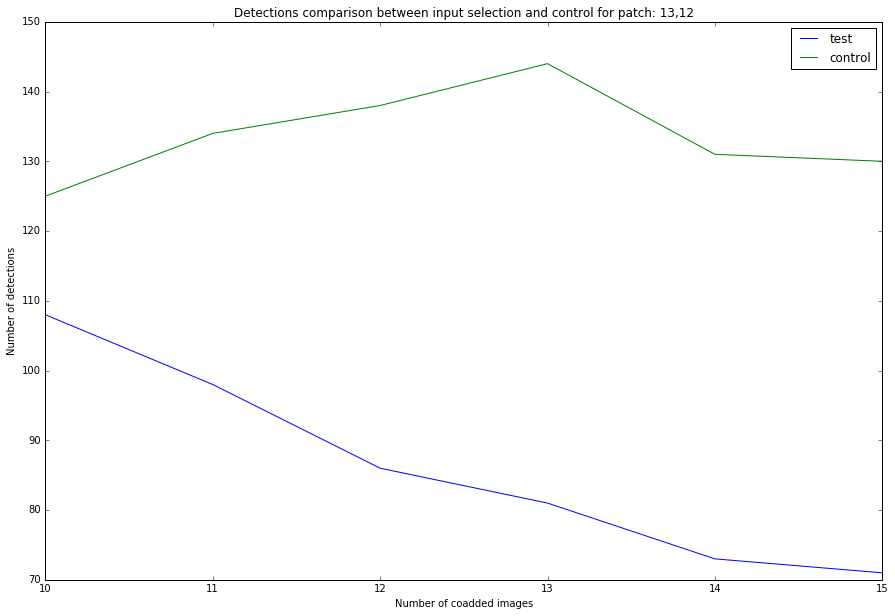

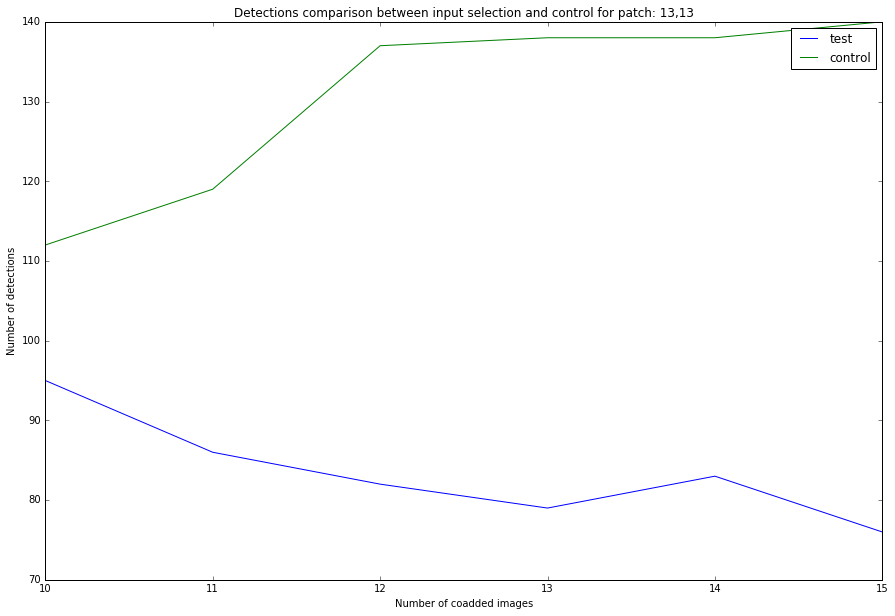

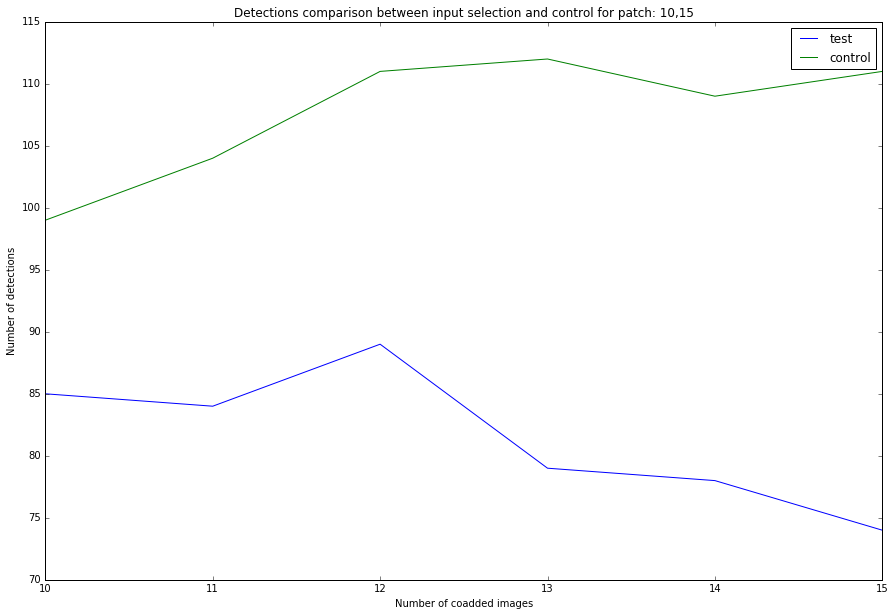

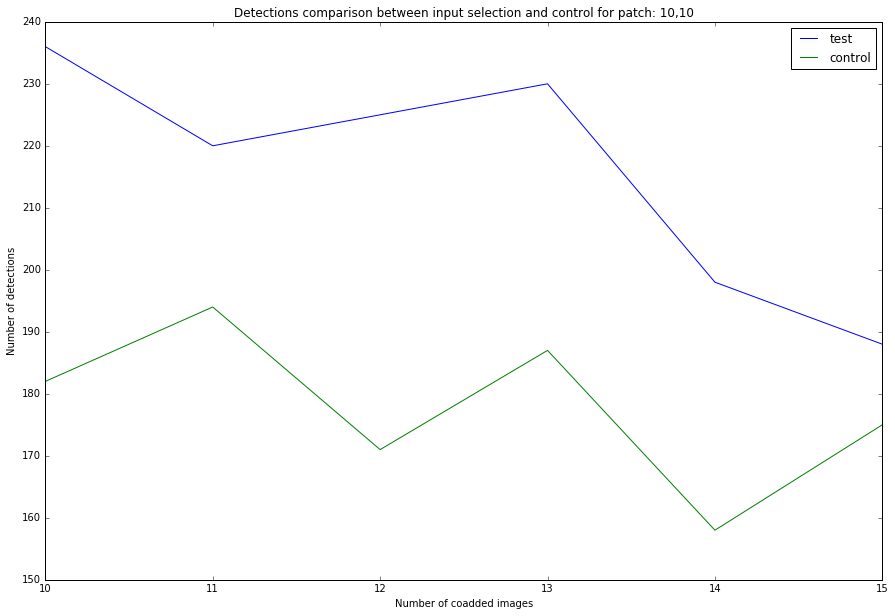

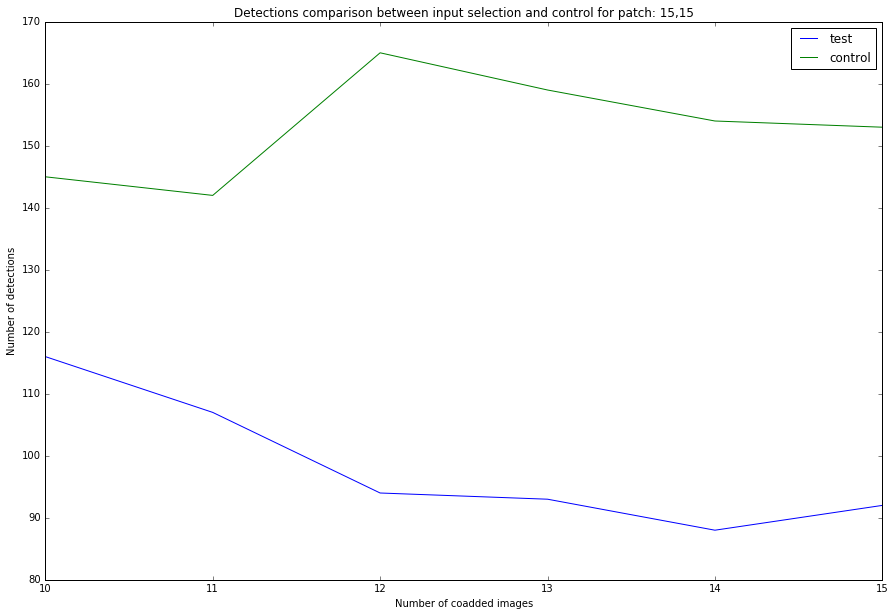

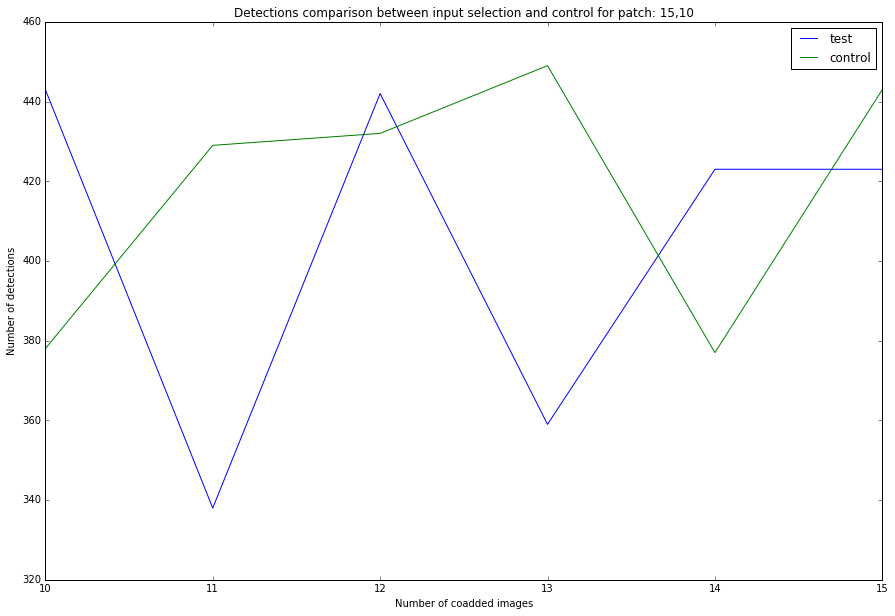

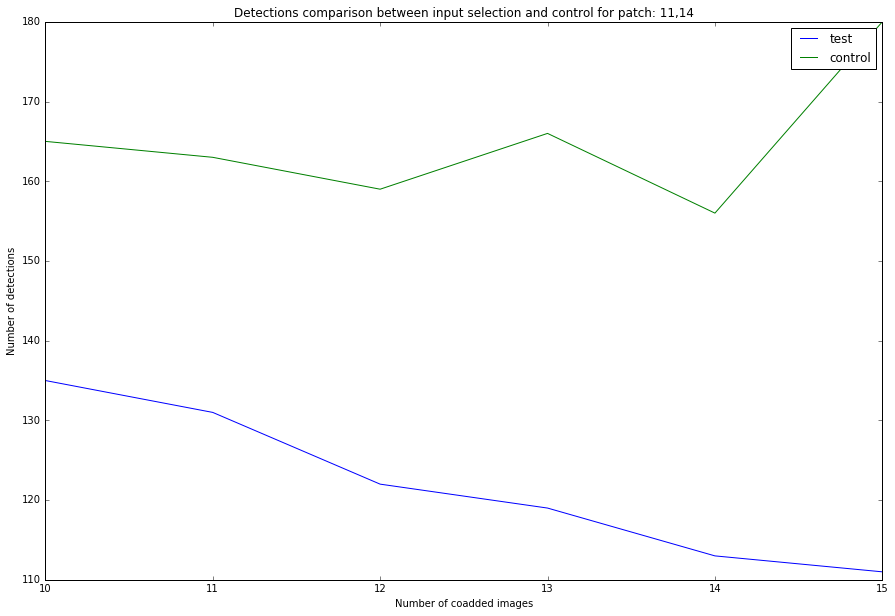

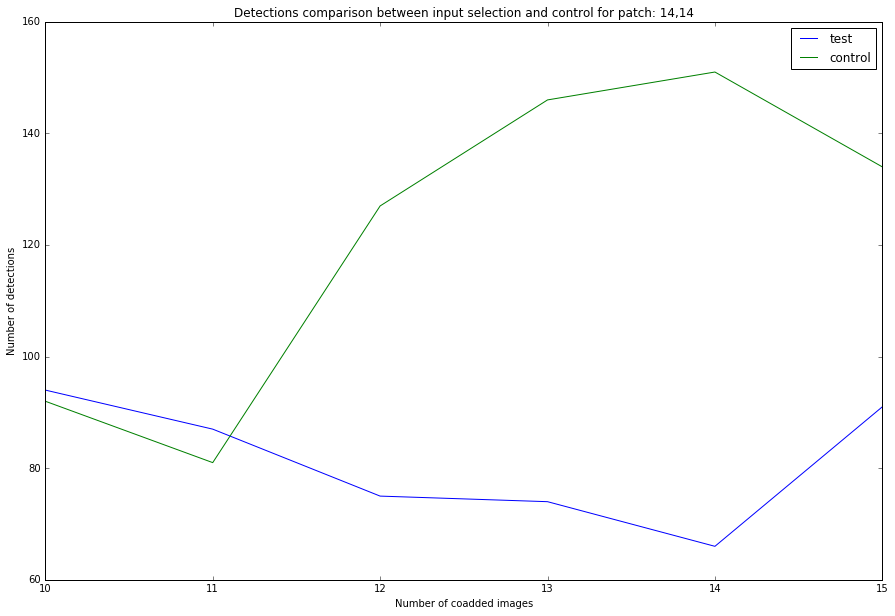

In [51]:

for patch in results_control.keys():
    plt.figure(figsize=(15,10))
    patch_arr_test = []
    patch_arr_control = []
    for ncoadd in results_control[patch].keys():
        patch_arr_test.append(results_tests[patch][ncoadd])
        patch_arr_control.append(results_control[patch][ncoadd])
        
    plt.plot(range(10,16),patch_arr_test, label="test")
    plt.plot(range(10,16),patch_arr_control, label="control")
    plt.title("Detections comparison between input selection and control for patch: "+patch)
    plt.xlabel("Number of coadded images")
    plt.ylabel("Number of detections")
    plt.legend()
    plt.show()

In [15]:
butler = dafPersist.Butler(DATADIR_TESTS+"15")
butler_control = dafPersist.Butler(DATADIR_CONTROL+"15")
comparative_results = {}

for day in days:

    for patch in patches:

        dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}
        if butler.datasetExists("dayDiff_class_diaSrc", dataId=dataId) and butler_control.datasetExists("dayDiff_class_diaSrc", dataId=dataId):
            diffcat = butler.get("dayDiff_class_diaSrc", dataId=dataId)
            diffcat_control = butler_control.get("dayDiff_class_diaSrc", dataId=dataId)
            comparative_results[patch]=(len(diffcat), len(diffcat_control))

In [16]:
for patch in comparative_results.keys():
    test, control = comparative_results[patch]
    if control<test:
        print patch, control, test

22,14 83 84
22,12 124 656
22,13 95 687
22,11 140 589
21,24 121 124
16,23 85 88
11,20 215 232
10,24 140 141
21,9 127 133
12,10 172 183
8,10 151 160
9,18 107 113
5,14 315 548
5,15 460 569
5,13 310 376
10,10 175 218
13,24 117 130
5,9 192 463
5,7 410 529
24,11 451 590
24,8 570 575
24,9 181 365
23,24 106 112
20,9 195 205
19,24 92 97
20,20 156 184
24,21 125 161
